In [ ]:
# 安裝 OpenOCR 與必要套件
!pip install numpy==1.24.4 openocr-python onnxruntime --force-reinstall

# 建立模型資料夾
!mkdir -p /content/models

# 下載檢測與辨識模型
# !wget -nc -O /content/models/openocr_det_model.onnx https://github.com/Topdu/OpenOCR/releases/download/v1.0/openocr_det_model.onnx
# !wget -nc -O /content/models/openocr_rec_model.onnx https://github.com/Topdu/OpenOCR/releases/download/v1.0/openocr_rec_model.onnx


  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
  Using cached openocr_python-0.0.9-py3-none-any.whl.metadata (4.4 kB)
  Using cached onnxruntime-1.21.1-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (4.5 kB)
  Using cached opencv_python-4.6.0.66-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached rapidfuzz-3.13.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached lmdb-1.6.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.1 kB)
  Using cached imgaug-0.4.0-py2.py3-none-any.whl.metadata (1.8 kB)
  Using cached PyYAML-6.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.1 kB)
  Using cached pyclipper-1.3.0.post6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.0 kB)
  Using cached coloredlogs-15.0.1-py2.py3-

In [ ]:
# 連結google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 初始化 OpenOCR 引擎
from openocr import OpenOCR
ocr_engine = OpenOCR(backend='onnx', device='cpu')

[2025/04/21 08:02:20] openrec INFO: Model not found. Downloading from https://github.com/Topdu/OpenOCR/releases/download/develop0.0.1/openocr_det_model.onnx...
[2025/04/21 08:02:22] openrec INFO: Model downloaded and saved at: /root/.cache/openocr/openocr_det_model.onnx
[2025/04/21 08:02:22] openrec INFO: Model not found. Downloading from https://github.com/Topdu/OpenOCR/releases/download/develop0.0.1/openocr_rec_model.onnx...
[2025/04/21 08:02:24] openrec INFO: Model downloaded and saved at: /root/.cache/openocr/openocr_rec_model.onnx


In [ ]:
from google.colab.patches import cv2_imshow
import cv2
# 藥物照片輸入及輸出位置
ori = '/content/drive/MyDrive/畢業專題/drug_photo/IMG_7031.jpg'
rem_ori = '/content/drive/MyDrive/畢業專題/drug_photo/IMG_7031.jpg'
input_img = cv2.imread(ori)
cv2_imshow(input_img)

AttributeError: 'NoneType' object has no attribute 'clip'

100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 161GB/s]


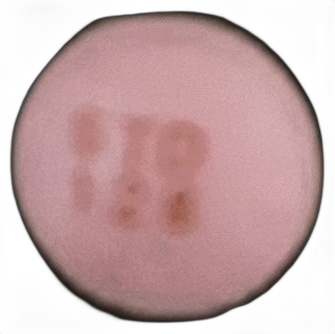

In [ ]:
# Step 1: 進行去背
!pip install rembg
from rembg import remove
import numpy as np

# Read the image and remove the background
input_img = cv2.imread(ori)
rembg_img = remove(input_img)

# Check if the image has an alpha channel (transparency)
if rembg_img.shape[2] == 4:
    alpha_channel = rembg_img[:, :, 3]

    # Apply slight blur to reduce noise in the alpha channel
    alpha_channel = cv2.GaussianBlur(alpha_channel, (5, 5), 0)

    # Create a mask where pixels are not transparent (alpha > threshold)
    _, mask = cv2.threshold(alpha_channel, 50, 255, cv2.THRESH_BINARY)

    # Find contours of non-transparent areas
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Get the bounding box for the largest contour (or union of top contours)
    if contours:
        # Sort contours by area and keep the largest one
        contours = sorted(contours, key=cv2.contourArea, reverse=True)

        # Use the largest contour for bounding box calculation
        x, y, w, h = cv2.boundingRect(contours[0])

        # Add margin to ensure we don’t crop out the imprint
        margin = 10
        x = max(0, x - margin)
        y = max(0, y - margin)
        w = min(rembg_img.shape[1] - x, w + 2 * margin)
        h = min(rembg_img.shape[0] - y, h + 2 * margin)

        # Crop the image to this bounding box with margin
        cropped_img = rembg_img[y:y+h, x:x+w]


        # Save the cropped image
        cv2.imwrite(rem_ori, cropped_img)

        # Display the cropped image
        cv2_imshow(cropped_img)
    else:
        print("No non-transparent regions found.")
else:
    print("The image does not have an alpha channel.")



📷 處理後影像預覽：
原圖


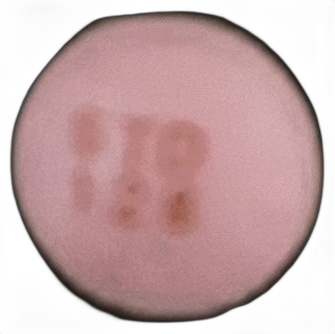

增強1


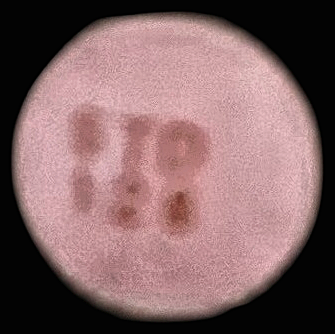

去飽和1


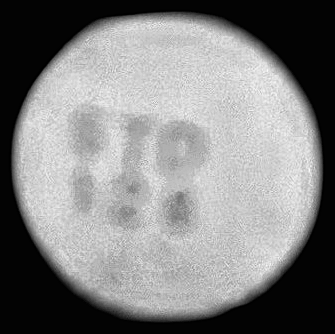

增強2


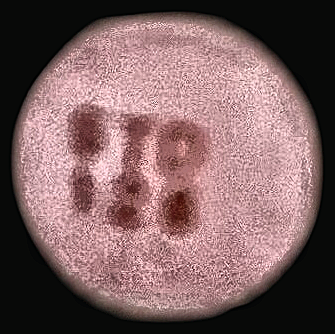

去飽和2


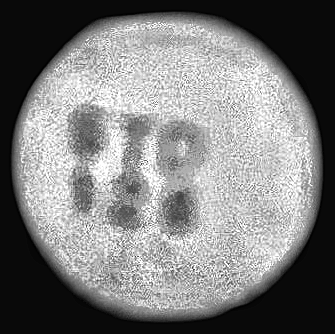

模糊優化


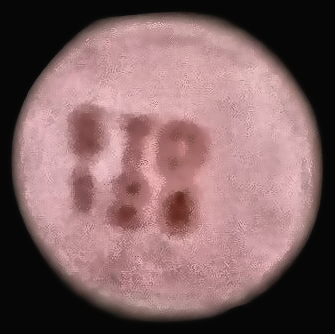

[2025/04/11 11:33:05] openrec INFO: Processing 1/1: /content/temp_原圖.jpg
[2025/04/11 11:33:05] openrec INFO: No text detected.
[2025/04/11 11:33:05] openrec INFO: No text detected.
[原圖] ❌ 沒有偵測到文字
[2025/04/11 11:33:05] openrec INFO: Processing 1/1: /content/temp_增強1.jpg
[2025/04/11 11:33:05] openrec INFO: Results: [{'transcription': '119', 'points': [[63, 90], [219, 102], [210, 212], [54, 199]], 'score': 0.5048033595085144}].
[2025/04/11 11:33:05] openrec INFO: Time cost: {'time_cost': 0.3038020133972168, 'detection_time': 0.11479973793029785, 'recognition_time': 0.18900227546691895, 'avg_rec_time_cost': 0.18752026557922363}.
[2025/04/11 11:33:05] openrec INFO: Results saved to e2e_results/system_results.txt.
[增強1] ✅ 辨識：['119']，平均信心：0.505
[2025/04/11 11:33:05] openrec INFO: Processing 1/1: /content/temp_去飽和1.jpg
[2025/04/11 11:33:06] openrec INFO: No text detected.
[2025/04/11 11:33:06] openrec INFO: No text detected.
[去飽和1] ❌ 沒有偵測到文字
[2025/04/11 11:33:06] openrec INFO: Processing 1/1: 

In [ ]:
import json, re, cv2
import numpy as np
from google.colab.patches import cv2_imshow

processed_bounds = []

def enhance_contrast(img, clip_limit, alpha, beta):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    merged = cv2.merge((cl, a, b))
    enhance_img = cv2.cvtColor(merged, cv2.COLOR_LAB2BGR)
    blurred = cv2.GaussianBlur(enhance_img, (5, 5), 3.0)
    return cv2.addWeighted(enhance_img, alpha, blurred, beta, 0)

def desaturate_image(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    s.fill(0)
    return cv2.cvtColor(cv2.merge([h, s, v]), cv2.COLOR_HSV2BGR)

def enhance_for_blur(img):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=3.5, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    enhanced_lab = cv2.merge((cl, a, b))
    contrast_img = cv2.cvtColor(enhanced_lab, cv2.COLOR_LAB2BGR)
    blurred = cv2.GaussianBlur(contrast_img, (3, 3), 1.0)
    sharpened = cv2.addWeighted(contrast_img, 1.8, blurred, -0.8, 0)
    final = cv2.bilateralFilter(sharpened, d=9, sigmaColor=75, sigmaSpace=75)
    return final

def extract_texts_from_openocr_result(ocr_result_str, min_score=0.8):
    result_json = json.loads(ocr_result_str[0].split('\t')[1])
    extracted = []
    for item in result_json:
        score = item.get("score", 1.0)
        if score < min_score:
            continue
        text = item['transcription'].strip().upper()
        text = re.sub(r'[^A-Z0-9\\-]', '', text)
        if text:
            extracted.append(text)
    return extracted

def recognize_with_openocr(img, name="default", min_score=0.8):
    temp_path = f"/content/temp_{name}.jpg"
    cv2.imwrite(temp_path, img)
    result, elapse = ocr_engine(temp_path)

    if result is None:
        print(f"[{name}] ❌ 沒有偵測到文字")
        return [], 0.0

    try:
        result_json = json.loads(result[0].split('\t')[1])
        valid = [r for r in result_json if r.get("score", 0) >= min_score]
        texts = []
        for r in valid:
            t = re.sub(r'[^A-Z0-9\-]', '', r["transcription"].strip().upper())
            if t:
                texts.append(t)
        avg_score = sum([r["score"] for r in valid]) / len(valid) if valid else 0.0
        print(f"[{name}] ✅ 辨識：{texts}，平均信心：{avg_score:.3f}")
        return texts, avg_score
    except Exception as e:
        print(f"[{name}] ⚠️ JSON 解析失敗：{e}")
        return [], 0.0

# 原圖（去背後）
img = cropped_img

# ➕ 產生所有版本影像（6 種）
final_img_1 = enhance_contrast(img, 1.5, 1.5, -0.5)
final_img_2 = desaturate_image(final_img_1)
final_img_3 = enhance_contrast(img, 5.5, 2.0, -1.0)
final_img_4 = desaturate_image(final_img_3)
final_img_5 = enhance_for_blur(img)

# 顯示版本預覽
print("\n📷 處理後影像預覽：")
for preview_name, preview_img in [
    ("原圖", img),
    ("增強1", final_img_1),
    ("去飽和1", final_img_2),
    ("增強2", final_img_3),
    ("去飽和2", final_img_4),
    ("模糊優化", final_img_5),
]:
    print(preview_name)
    cv2_imshow(preview_img)

# 定義版本清單
image_versions = [
    (img, "原圖"),
    (final_img_1, "增強1"),
    (final_img_2, "去飽和1"),
    (final_img_3, "增強2"),
    (final_img_4, "去飽和2"),
    (final_img_5, "模糊優化")
]

# 執行 OCR 並記錄
version_results = {}
score_dict = {}

for img_v, name in image_versions:
    texts, avg_score = recognize_with_openocr(img_v, name, min_score=0.5)
    version_results[name] = texts
    score_dict[name] = avg_score

# 綜合選出最佳版本
score_combined = {}
for k in version_results:
    total_chars = sum(len(txt) for txt in version_results[k])
    avg_score = score_dict[k]
    score_combined[k] = total_chars * avg_score

best_name = max(score_combined, key=score_combined.get)
best_texts = version_results[best_name]

# 模糊警示
is_blurry = (not best_texts) and (score_dict[best_name] < 0.6)

print(f"\n🌟 最佳版本：{best_name}")
print(f"📋 合併辨識結果：{best_texts}")
if is_blurry:
    print("⚠️ 可能為模糊圖片，建議重新拍攝")

processed_bounds = best_texts  # 給 identify() 使用


In [ ]:
# Step 3: 藥品判斷系統
def match_any(texts, keywords):
    return any(code in texts for code in keywords)

def identify(texts = [], colors = [], shape = "N/A"):
    if match_any(texts, ["511"]) or (("Yellow" in colors) and ("Black" in colors) and (shape == "capsule")):
        return ["Soma Capsules", "關節、神經肌肉等疼痛之緩解", "1.使用本藥品後，代謝物可能引起尿液變色（罕見）。此為正常藥效作用反應，請按時服藥。2.本藥服用後可能會想睡覺，請多加注意。", "暈眩、視覺模糊、嘔吐、緊張不安、頭昏等。"]

    if match_any(texts, ["128"]) or (("Pink" in colors) and (shape == "circle")):
        return ["Diclofenac Potassium", "鎮痛、消炎劑（退燒解熱）", "使用本品可能發生罕見但嚴重之皮膚不良/過敏反應，如用藥後發生喉痛、口腔/黏膜潰爛、皮疹等症狀，應考慮可能為藥品不良反應，宜立即就醫並考慮停藥。", "眩暈、胃腸道不適、過敏症狀等等，以上大約(1%-10%)發生率。"]

    if match_any(texts, ["CH", "33", "HJ"]) or (("White" in colors) and (shape == "circle")):
        return ["Famotidine", "胃潰瘍、十二指腸潰瘍、胃食道逆流症", "本品會降低某些抗黴菌藥之療效。", "便秘、腹瀉、頭痛、暈眩"]

    if match_any(texts, ["NYR", "NY", "MY", "MR"]) or (("Yellow" in colors) and (shape == "circle")):
        return ["Exforge", "治療高血壓", "1.服藥期間應避免使用葡萄柚及其相關食品，以免交互作用發生。2.高血壓且懷孕之婦女不建議使用本藥。", "低血壓(<1%)、周邊水腫(5.4%)、眩暈(2.1%)、鼻咽炎(4.3%)、上呼吸道感染(2.9%)發生率。"]

    if match_any(texts, ["ST", "427", "51"]) or (("White" in colors) and (shape == "capsule")):
        return ["Gliclazide MR", "降血糖藥", "1.本品為持續性藥效錠， 不可以磨粉但可剝半。2.請勿和酒精一起使用。3.和苦瓜併用會增加降血糖作用,導致低血糖發生,必要時要監測血糖值。4.高警訊藥品", "下痢，噁心嘔吐，偏頭痛，疲倦，腹痛等等，以上大約(0.1%-1%) 發生率。"]

    if match_any(texts, ["MB50", "MB50E", "MBS0E", "MB50="]) or (("Red" in colors) and (shape == "capsule")):
        return ["Mecobalamin", "維生素B12、改善末梢性神經障礙", "室溫避光保存", "厭食、噁心、嘔吐、下痢等等，以上大約(0.1%-5%) 發生率。"]

    if match_any(texts, ["CTA23", "GTA23", "GTA231", "CTA231"]) or (("Red" in colors) and (shape == "capsule")):
        return ["Silymarin", "慢性肝病，肝硬變及脂肪肝之佐藥", "服藥期間有任何問題，請打用藥諮詢專線", "偶而有輕瀉或利尿的作用。"]

    if match_any(texts, ["20", "ATV"]) or (("White" in colors) and (shape == "circle")):
        return ["atorvastatin", "降血脂藥、高膽固醇血症、高三酸甘油脂血症", "不可與葡萄柚汁同時服用", "胸痛、噁心、鼻咽炎、關節炎、周邊水腫等等，以上大約(2%) 發生率。"]

    if match_any(texts, ["S10PHUT", "SHNPHAR", "S1NPHAT"]) or (("White" in colors) and (shape == "capsule")):
        return ["Acetaminophen", "退燒、止痛", "1.建議一天(24小時)使用劑量不要超過4000毫克。2.服藥期間請勿喝酒或酒精類飲料", "發疹、發紅、噁心、嘔吐、食慾不振、頭暈等等，以上大約(1-10%)左右。"]

    if match_any(texts, ["VPC", "PC", "VR", "44", "445"]) or (("White" in colors) and (shape == "circle")):
        return ["MAGnesium Oxide", "軟便、緩解胃部不適或灼熱感、或胃炎、食道炎所伴隨之胃酸過多", "服藥期間有任何問題, 請打用藥諮詢專線", "輕微腹瀉"]

    if match_any(texts, ["39", "89", "68", "EEP", "ECP"]) or (("White" in colors) and (shape == "capsule")):
        return ["Metformin HCL", "降血糖藥", "1.請依醫師指示按時服用。2.和苦瓜併用會增加降血糖作用,導致低血糖發生,必要時要監測血糖值。", "下痢、消化不良、脹氣、噁心嘔吐等。"]

    return False



In [ ]:
import os
import pandas as pd
from glob import glob
from tqdm.auto import tqdm

# 路徑設定 (你已經提供的路徑)
img_folder = '/content/drive/MyDrive/畢業專題/drug_photo'

# 取得資料夾內所有圖片路徑（支援 jpg, jpeg, png）
img_paths = glob(os.path.join(img_folder, '*.jpg')) + \
            glob(os.path.join(img_folder, '*.jpeg')) + \
            glob(os.path.join(img_folder, '*.png')) + \
            glob(os.path.join(img_folder, '*.JPG')) + \
            glob(os.path.join(img_folder, '*.PNG'))



print(f"📦 共讀取到 {len(img_paths)} 張圖片準備處理")

# 結果儲存列表
results_data = []
error_rows = []

# 批量處理每張圖片
for img_path in tqdm(img_paths, desc="🔍 正在批次辨識所有圖片"):
    try:
        filename = os.path.basename(img_path)
        print(f"\n🔍 處理圖片：{filename}")

        # Step 1: 讀取並去背
        input_img = cv2.imread(img_path)
        rembg_img = remove(input_img)

        # Alpha channel檢查並裁切
        if rembg_img.shape[2] == 4:
            alpha_channel = rembg_img[:, :, 3]
            alpha_channel = cv2.GaussianBlur(alpha_channel, (5, 5), 0)
            _, mask = cv2.threshold(alpha_channel, 50, 255, cv2.THRESH_BINARY)
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            if contours:
                contours = sorted(contours, key=cv2.contourArea, reverse=True)
                x, y, w, h = cv2.boundingRect(contours[0])
                margin = 10
                x = max(0, x - margin)
                y = max(0, y - margin)
                w = min(rembg_img.shape[1] - x, w + 2 * margin)
                h = min(rembg_img.shape[0] - y, h + 2 * margin)
                cropped_img = rembg_img[y:y+h, x:x+w]
            else:
                print(f"{filename} ❌ 無輪廓")
                continue
        else:
            print(f"{filename} ❌ 無透明通道")
            continue

        # Step 2: 影像增強版本
        image_versions = {
            "原圖": cropped_img,
            "增強1": enhance_contrast(cropped_img, 1.5, 1.5, -0.5),
            "去飽和1": desaturate_image(enhance_contrast(cropped_img, 1.5, 1.5, -0.5)),
            "增強2": enhance_contrast(cropped_img, 5.5, 2.0, -1.0),
            "去飽和2": desaturate_image(enhance_contrast(cropped_img, 5.5, 2.0, -1.0)),
        }

        version_results = {}
        score_dict = {}

        # Step 3: OCR辨識每個版本
        for name, img_v in image_versions.items():
          # 第一次嘗試：原始方向
          rotation_attempts = [("原始", img_v),
                     ("旋轉90", cv2.rotate(img_v, cv2.ROTATE_90_CLOCKWISE)),
                     ("旋轉180", cv2.rotate(img_v, cv2.ROTATE_180)),
                     ("旋轉270", cv2.rotate(img_v, cv2.ROTATE_90_COUNTERCLOCKWISE))]

          for rot_name, rotated in rotation_attempts:
              texts_try, score_try = recognize_with_openocr(rotated, name + "_" + rot_name, min_score=0.5)
              if texts_try:
                  texts = texts_try
                  avg_score = score_try
                  break


          version_results[name] = texts
          score_dict[name] = avg_score


        # 計算最佳版本
        score_combined = {k: sum(len(txt) for txt in version_results[k]) * score_dict[k] for k in version_results}
        best_name = max(score_combined, key=score_combined.get)
        best_texts = version_results[best_name]
        # 藥品資料比對：呼叫 identify 函式（自行定義的藥品資料比對邏輯）
        try:
            medicine_info = identify(best_texts)
            if medicine_info:
                medicine_name = medicine_info[0]
                match_status = "Matched"
            else:
                medicine_name = ""
                match_status = "Unmatched"
        except Exception as e:
            medicine_name = ""
            match_status = f"Error: {str(e)}"

        # 紀錄結果
        results_data.append({
            "filename": filename,
            "best_version": best_name,
            "recognized_text": ", ".join(best_texts),
            **{f"{name}_texts": ", ".join(txts) for name, txts in version_results.items()},
            **{f"{name}_score": round(score, 3) for name, score in score_dict.items()},
            "Matched_Medicine": medicine_name,
            "Match_Status": match_status,

        })

    except Exception as e:
        print(f"❗ 處理 {filename} 錯誤：{e}")
        error_rows.append({
            "image_name": filename,
            "error_message": str(e)
        })

# Step 4: 儲存報表
results_df = pd.DataFrame(results_data)
csv_path = "/content/ocr_results_report.csv"
results_df.to_csv(csv_path, index=False, encoding='utf-8-sig')

print(f"\n📊 全部辨識結果已儲存於：{csv_path}")

# 儲存錯誤記錄
if error_rows:
    error_df = pd.DataFrame(error_rows)
    error_df.to_csv("/content/ocr_errors.csv", index=False)
    print(f"⚠️ 錯誤記錄已輸出：ocr_errors.csv")

# 顯示前幾筆結果
results_df.head()


📦 共讀取到 108 張圖片準備處理


🔍 正在批次辨識所有圖片:   0%|          | 0/108 [00:00<?, ?it/s]


🔍 處理圖片：IMG_7022.jpg
[2025/04/11 11:33:19] openrec INFO: Processing 1/1: /content/temp_原圖_原始.jpg
[2025/04/11 11:33:20] openrec INFO: Results: [{'transcription': 'CTA-231', 'points': [[442, 137], [655, 123], [660, 188], [447, 203]], 'score': 0.9845441579818726}, {'transcription': 'CTA-231', 'points': [[160, 186], [372, 169], [378, 233], [165, 251]], 'score': 0.8779093623161316}].
[2025/04/11 11:33:20] openrec INFO: Time cost: {'time_cost': 0.7296171188354492, 'detection_time': 0.4366791248321533, 'recognition_time': 0.2929379940032959, 'avg_rec_time_cost': 0.2910726070404053}.
[2025/04/11 11:33:20] openrec INFO: Results saved to e2e_results/system_results.txt.
[原圖_原始] ✅ 辨識：['CTA-231', 'CTA-231']，平均信心：0.931
[2025/04/11 11:33:20] openrec INFO: Processing 1/1: /content/temp_增強1_原始.jpg
[2025/04/11 11:33:21] openrec INFO: Results: [{'transcription': 'CTA-231', 'points': [[440, 135], [656, 120], [661, 189], [445, 205]], 'score': 0.9749479293823242}, {'transcription': 'CTAJ3!', 'points': [[160

,filename,best_version,recognized_text,原圖_texts,增強1_texts,去飽和1_texts,增強2_texts,去飽和2_texts,原圖_score,增強1_score,去飽和1_score,增強2_score,去飽和2_score,Matched_Medicine,Match_Status
0,IMG_7022.jpg,原圖,"CTA-231, CTA-231","CTA-231, CTA-231","CTA-231, CTAJ3","CTA-231, CTA-23","CTA-231, CTAR","CTA-23, CTARN",0.931,0.871,0.904,0.842,0.650,,Unmatched
1,IMG_7023.jpg,去飽和2,"CTA-231, CTA-23","CTA-231, CTA-23","CTA-231, CTA-23","CTA-231, CTA-23","CTA-231, CTA-23","CTA-231, CTA-23",0.970,0.978,0.967,0.978,0.984,,Unmatched
2,IMG_7039.jpg,去飽和1,DPIZAN,PIZAR,DPIAR,DPIZAN,DPIAR,DJIAN,0.560,0.661,0.641,0.624,0.638,,Unmatched
3,IMG_6931.jpg,原圖,"STD, STD, 511","STD, STD, 511","STD, STD, 511","STD, STD, 511","STQ, STD, 511","STD, STD, 511",0.987,0.919,0.972,0.940,0.927,Soma Capsules,Matched
4,IMG_6930.jpg,原圖,"STS, 1, S5","STS, 1, S5","1, S","E, S5, STO",S5,"90, STO",0.838,0.835,0.681,0.841,0.817,,Unmatched


In [ ]:
# 記錄辨識成效到 Excel (Google Drive)
from datetime import date
import pandas as pd

# 輸出結果報表檔案路徑
excel_log_path = "/content/drive/MyDrive/畢業專題/weekly_ocr_progress.xlsx"

# 成功辨識張數
results_df["recognized_text"] = results_df["recognized_text"].fillna("").astype(str)
# 設定信心門檻
confidence_threshold = 0.8

def is_successful(row):
    best_ver = row["best_version"]
    score_col = f"{best_ver}_score"
    score = row.get(score_col, 0)
    text = row["recognized_text"]
    return (len(text.strip()) > 0) and (score >= confidence_threshold)

# 使用新的條件計算成功數量
success_count = results_df.apply(is_successful, axis=1).sum()

total_count = len(results_df)

# 本週紀錄
today = date.today()
from datetime import date, timedelta

today = date.today()
week_start = today - timedelta(days=today.weekday())
week_number = (week_start - date(2025, 1, 1)).days // 7 + 1  # 根據 2025/1/1 作為 Week 1 起算
week_label = f"Week {week_number} ({week_start.isoformat()})"

log_row = pd.DataFrame([{
    "Date": today,
    "Week": week_label,
    "Total_Images": total_count,
    "Successful_Recognitions": success_count,
    "Success_Rate (%)": round(success_count / total_count * 100, 2)
}])

# 寫入或更新 Excel
try:
    prev_log = pd.read_excel(excel_log_path)
    combined_log = pd.concat([prev_log, log_row], ignore_index=True)
except FileNotFoundError:
    combined_log = log_row

combined_log.to_excel(excel_log_path, index=False)
print(f"✅ 本週辨識結果已記錄到：{excel_log_path}")


✅ 本週辨識結果已記錄到：/content/drive/MyDrive/畢業專題/weekly_ocr_progress.xlsx


In [ ]:
# Step 4: 透過辨識出來的編號判斷是否有對應藥品，若有則程式直接結束
result = identify(processed_bounds)
print(result)
if result:
    print("藥品學名：" + result[0] + "\n適應症狀：" + result[1] + "\n注意事項：" + result[2] + "\n副作用：" + result[3])
    exit()

False


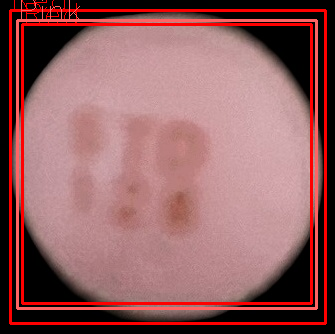

In [ ]:
# Step 5: 若沒有成功對應到藥品編號則開始辨識顏色跟形狀

# 載入圖片
image = cv2.imread(rem_ori)
# image = cv2.imread("/content/drive/MyDrive/removed/IMG_7037.jpg")

# 將圖片轉換為HSV色彩空間
hsvFrame = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 定義不同顏色的範圍並建立掩膜（array順序：BGR）

pink_mask = cv2.inRange(hsvFrame, np.array([50, 50, 150], np.uint8), np.array([250, 250, 255], np.uint8))
red_mask = cv2.inRange(hsvFrame, np.array([0, 50, 50], np.uint8), np.array([10, 170, 200], np.uint8))

# 黃色
yellow_mask = cv2.inRange(hsvFrame, np.array([15, 200, 200], np.uint8), np.array([30, 255, 255], np.uint8))

# 黑色
black_mask = cv2.inRange(hsvFrame, np.array([2, 2, 2], np.uint8), np.array([50, 50, 50], np.uint8))

# 白色
white_mask = cv2.inRange(hsvFrame, np.array([200, 200, 150], np.uint8), np.array([255, 255, 255], np.uint8))

# 定義 kernel 並應用形態學操作
kernel = np.ones((5, 5), "uint8")

# Dilation 操作
red_mask = cv2.dilate(red_mask, kernel)
pink_mask = cv2.dilate(pink_mask, kernel)
yellow_mask = cv2.dilate(yellow_mask, kernel)
black_mask = cv2.dilate(black_mask, kernel)
white_mask = cv2.dilate(white_mask, kernel)

# Bitwise_and 運算
res_red = cv2.bitwise_and(image, image, mask=red_mask)
res_pink = cv2.bitwise_and(image, image, mask=pink_mask)
res_yellow = cv2.bitwise_and(image, image, mask=yellow_mask)
res_black = cv2.bitwise_and(image, image, mask=black_mask)
res_white = cv2.bitwise_and(image, image, mask=white_mask)

# 定義顏色辨識的輪廓並列出主顏色
main_color = []
def detect_color(mask, color_name, image, box_color):
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 10000:
            main_color.append(color_name)
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(image, (x, y), (x + w, y + h), box_color, 2)
            cv2.putText(image, color_name, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1.0, box_color)

# 辨識顏色
detect_color(red_mask, "Red", image, (0, 0, 255))
detect_color(pink_mask, "Pink", image, (100, 100, 255))
detect_color(yellow_mask, "Yellow", image, (0, 255, 255))
detect_color(black_mask, "Black", image, (0, 165, 255))
detect_color(white_mask, "White", image, (255, 255, 255))

# 顯示結果
cv2_imshow(image)



# 辨識形狀

# 載入已去背處理過的圖片（帶透明背景的圖像）
image = cv2.imread(rem_ori, cv2.IMREAD_UNCHANGED)
# image = cv2.imread("/content/drive/MyDrive/removed/IMG_6934.jpg", cv2.IMREAD_UNCHANGED)

# 確保圖像是 RGB 或 RGBA 格式，將其轉換為灰階
if image.shape[2] == 4:  # 如果是 RGBA
    # 忽略透明通道，轉換為灰階
    gray = cv2.cvtColor(image, cv2.COLOR_BGRA2GRAY)
else:
    # 如果是 RGB，直接轉換為灰階
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 高斯模糊來減少雜訊
gray = cv2.GaussianBlur(gray, (5, 5), 0)

# 將圖片轉換為二值化圖像
_, thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

# 找出輪廓
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 假設只需要辨識最大的輪廓
if contours:
    c = max(contours, key=cv2.contourArea)

    # 計算周長並近似多邊形
    peri = cv2.arcLength(c, True)

    # 調整這個值來控制精度
    approx = cv2.approxPolyDP(c, 0.0225 * peri, True)

    # 計算外接矩形的長寬比
    x, y, w, h = cv2.boundingRect(approx)
    aspect_ratio = w / float(h)

# 辨識形狀
if len(approx) == 8:
    shape = "capsule"  # 辨識八邊型
elif 0.2 < aspect_ratio < 0.5:  # 一個合理的膠囊形狀長寬比範圍
    shape = "capsule"  # 辨識膠囊形狀
elif len(approx) > 8:
    shape = "circle"  # 辨識圓形
else:
    shape = "unidentified"

In [ ]:
# Step 6: 透過辨識出來的顏色和形狀判斷是否有對應藥品，若有則程式直接結束
result = identify([], main_color, shape)


if result:
    print("藥品學名：" + result[0] + "\n適應症狀：" + result[1] + "\n注意事項：" + result[2] + "\n副作用：" + result[3])
    # exit()

藥品學名：Mecobalamin
適應症狀：維生素B12、改善末梢性神經障礙
注意事項：室溫避光保存
副作用：厭食、噁心、嘔吐、下痢等等，以上大約(0.1%-5%) 發生率。


In [ ]:
# Draw bounding boxes
import PIL
from PIL import ImageDraw

def draw_openocr_boxes(image_path, ocr_result, color='red', width=2):
    image = PIL.Image.open(image_path).convert("RGB")
    draw = ImageDraw.Draw(image)
    try:
        json_result = json.loads(ocr_result[0].split("\t")[1])
        for item in json_result:
            box = item["points"]
            draw.line(box + [box[0]], fill=color, width=width)
    except Exception as e:
        print("⚠️ 畫框失敗：", e)
    return image
boxed_image = draw_openocr_boxes(rem_ori, result)
boxed_image.show()


⚠️ 畫框失敗： list index out of range
